In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [149]:
df = pd.read_csv('train.csv')

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [151]:
df.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [152]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [153]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [154]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [155]:
p=df.isnull().sum()/len(data)*100
new = pd.concat([df.isnull().sum(), p],axis=1,keys=['Total','%'])
new

,Total,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


we drop PassengerId and cabin 
we fill other missing values with mean or median 

In [156]:
df.drop(columns={'PassengerId'},axis=1,inplace=True)

In [157]:
df.drop(columns={'Cabin'},inplace=True)

In [158]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)   

In [159]:
mean = df.groupby(['Sex'])['Age'].transform('mean')
df['Age'] = df['Age'].fillna(mean)

In [160]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

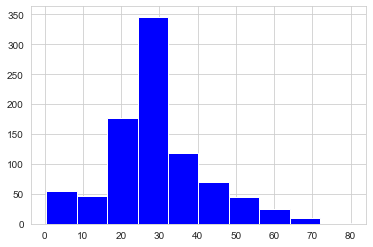

In [164]:
plt.hist(df['Age'],color='blue')
plt.show()

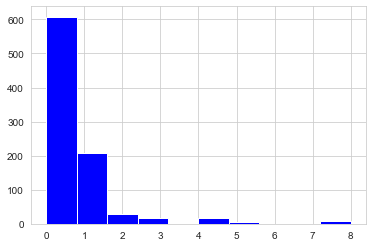

In [165]:
plt.hist(df['SibSp'],color='blue')
plt.show()

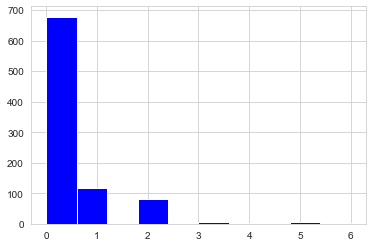

In [166]:
plt.hist(df['Parch'],color='blue')
plt.show()

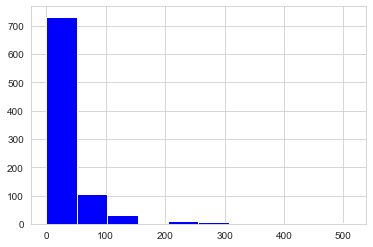

In [167]:
plt.hist(df['Fare'],color='blue')
plt.show()

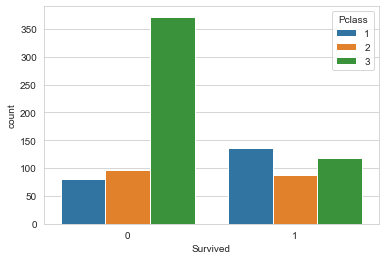

In [168]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue=df['Pclass'],data=df)   
plt.show()

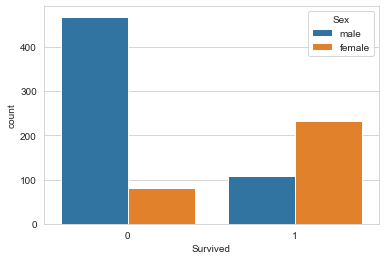

In [169]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue=df['Sex'],data=df)   
plt.show()

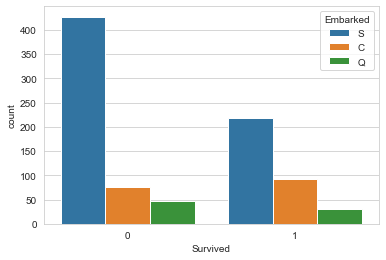

In [170]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue=df['Embarked'],data=df)   
plt.show()

<AxesSubplot:>

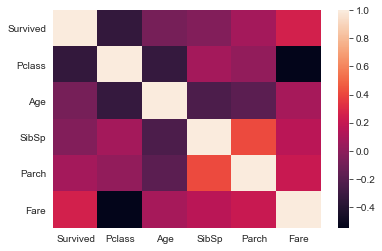

In [171]:
df.corr()
sns.heatmap(df.corr())

We already saw in the previous titanic checkpoint that Pclass, sex and embarked are the chosen features, we're going to study them a bit more

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

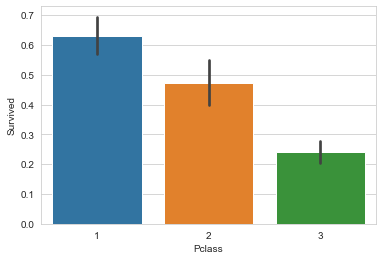

In [172]:
sns.barplot(x='Pclass' , y='Survived' , data=df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

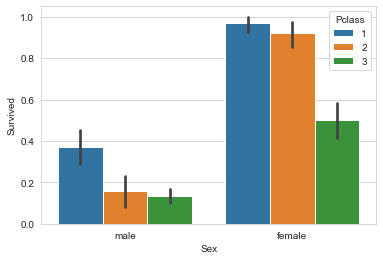

In [173]:
sns.barplot(x='Sex', y='Survived' , hue='Pclass' , data=df)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

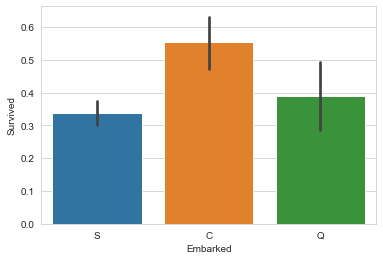

In [174]:
sns.barplot(x='Embarked' , y='Survived' , data=df)

In [175]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embarked = pd.get_dummies(df['Embarked'],drop_first=True)
df.drop(['Sex','Embarked','Name'],axis=1,inplace=True)
df = pd.concat([df,sex,embarked],axis=1)
df.head(20)


,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,0,3,22.000000,1,0,A/5 21171,7.2500,1,0,1
1,1,1,38.000000,1,0,PC 17599,71.2833,0,0,0
2,1,3,26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1
3,1,1,35.000000,1,0,113803,53.1000,0,0,1
4,0,3,35.000000,0,0,373450,8.0500,1,0,1
5,0,3,30.726645,0,0,330877,8.4583,1,1,0
6,0,1,54.000000,0,0,17463,51.8625,1,0,1
7,0,3,2.000000,3,1,349909,21.0750,1,0,1
8,1,3,27.000000,0,2,347742,11.1333,0,0,1
9,1,2,14.000000,1,0,237736,30.0708,0,0,0


In [194]:
x=df[['Pclass','Age','SibSp','Parch', 'Fare', 'male','Q','S','Ticket']]
X_train, X_test, y_train, y_test = train_test_split(x, df['Survived'],test_size=0.20, random_state=100)


In [196]:
mod = LogisticRegression()
mod.fit(X_train,y_train)

ValueError: could not convert string to float: 'CA 2144'

In [189]:
predictions = logmodel.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [190]:
accuracy=confusion_matrix(y_test,predictions)

NameError: name 'predictions' is not defined

In [ ]:
accuracy=accuracy_score(y_test,predictions)
accuracy